In [1]:
import pandas as pd
import nlp.sanitize as st
import nlp.embedding as eb                                                                                                                                                          

%load_ext autoreload
%autoreload 2

c:\users\e0205024\pycharmprojects\crowd\venv\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
tweet = pd.ExcelFile('./data/tweet_merged.xlsx')
data = tweet.parse('Sheet1')
data = st.standardize(data, 'tweet_text')
print(data['tokens'].head())

0                [waiting, for, train, to, arrive, at]
1    [waiting, for, the, train, to, arrive, with, j...
2           [waiting, for, the, train, to, arrive, at]
3    [exit, entrance, f, is, pretty, cool, at, litt...
4    [i, just, don, t, feel, like, walking, tamad, ...
Name: tokens, dtype: object


In [3]:
from sklearn.model_selection import train_test_split
import nlp.lsa as lsa
from sklearn.linear_model import LogisticRegression
from nlp.embedding import load_embeddings

label = data['RELEVANCE']
embeddings = load_embeddings('./data/embeddings_merged')
X_train, X_test, y_train, y_test = train_test_split(embeddings[:700], label[:700], test_size=0.2, random_state=40)

fig = lsa.plt.figure(figsize=(10, 10))
lsa.plot_lsa(embeddings, label)
lsa.plt.show()

In [4]:
print(len(embeddings[0]))
print(len(X_train))
print(len(X_test))

300
560
140


Train the logistic regression model and test the model.

accuracy = 0.879, precision = 0.879, recall = 0.879, f1 = 0.879


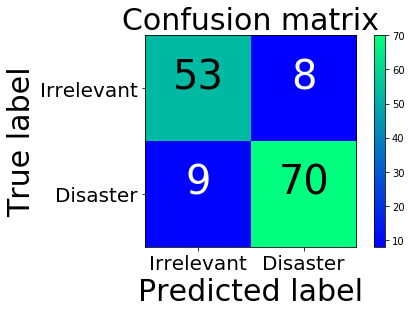

Word2Vec confusion matrix
[[53  8]
 [ 9 70]]


In [5]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                             multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train, y_train)
y_predicted = clf_w2v.predict(X_test)

res = lsa.get_metrics(y_test, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % res)

plot, cm = lsa.plot_confusion_matrix(y_test, y_predicted, classes=['Irrelevant', 'Disaster'], normalize=False,
                                 title='Confusion matrix')
lsa.plt.show()
print("Word2Vec confusion matrix")
print(cm)

Train error for the model.

accuracy = 0.973, precision = 0.973, recall = 0.973, f1 = 0.973


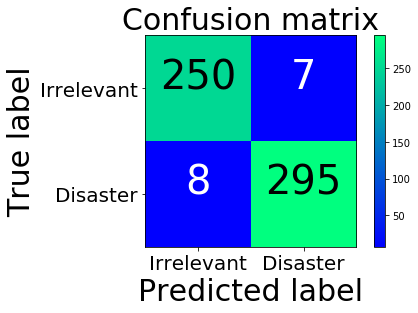

Word2Vec confusion matrix
[[250   7]
 [  8 295]]


In [6]:
y_train_predicted = clf_w2v.predict(X_train)

res = lsa.get_metrics(y_train, y_train_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % res)

plot, cm = lsa.plot_confusion_matrix(y_train, y_train_predicted, classes=['Irrelevant', 'Disaster'], normalize=False,
                                 title='Confusion matrix')
lsa.plt.show()
print("Word2Vec confusion matrix")
print(cm)

Train the model with whole labeled data set.

accuracy = 0.967, precision = 0.967, recall = 0.967, f1 = 0.967


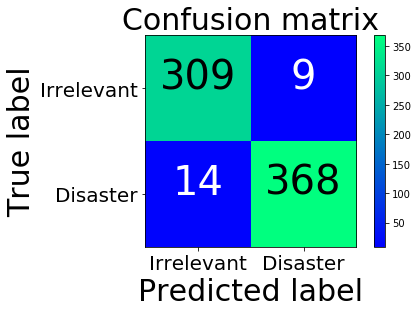

Word2Vec confusion matrix
[[309   9]
 [ 14 368]]


In [7]:
clf_w2v.fit(embeddings[:700], label[:700])

pred = clf_w2v.predict(embeddings[:700])

res = lsa.get_metrics(label[:700], pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % res)

plot, cm = lsa.plot_confusion_matrix(label[:700], pred, classes=['Irrelevant', 'Disaster'], normalize=False,
                                 title='Confusion matrix')
lsa.plt.show()
print("Word2Vec confusion matrix")
print(cm)

In [8]:
import numpy as np

pred = np.array(clf_w2v.predict(embeddings[700:]))
print(np.sum(pred))
indices=np.where(pred==1)+np.array(700)
sentence=data['tweet_text'][indices[0]]
print(sentence[:10])

1499.0
700     fucking pubor block my way make me miss my tra...
708     i'm at smrt trains  north south line (nsl) in ...
783                i'm at blk 250 chou chu kang avenue 2 
843     fucking late (at pioneer mrt station (ew28)   ...
847     kns  what is late   long queue  ?? (at toa pay...
1005    i'm at smrt trains  north south line (nsl) in ...
1170    aft weeeeks (at yew tee mrt station (ns5)    i...
1197    lines will guide you home, literally \n\nlines...
1328    i'm at smrt trains  north south line (nsl) in ...
1390    can the train be faster i am hungry too (at mo...
Name: tweet_text, dtype: object


In [9]:
writer = pd.ExcelWriter('./data/relevance_predict.xlsx')
df1 = pd.DataFrame(data=sentence)
df1.to_excel(writer,'Sheet1')
writer.save()